## Import and Install Dependencies

In [1]:
!pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0 opencv-python mediapipe sklearn matplotlib --user

## Keypoints using MP Holistic

In [1]:
import cv2
import numpy as np
import os
from os.path import join, exists
import pickle
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils 

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=1, circle_radius=2), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=1, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=1, circle_radius=2), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=1, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=1, circle_radius=2), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=1, circle_radius=2)
                             ) 

In [6]:
import cv2
cap = cv2.VideoCapture(0)
cv2.namedWindow("Window")
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while True:

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow("Window", image)

        # Break gracefully
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
#video_capture = cv2.VideoCapture(0)

#cv2.namedWindow("Window")

#while True:
#    ret, frame = video_capture.read()
#    cv2.imshow("Window", frame)
#
     #This breaks on 'q' key
  #  if cv2.waitKey(1) & 0xFF == ord('q'):
   #     break

#video_capture.release()
#cv2.destroyAllWindows()

In [8]:
draw_styled_landmarks(frame, results)

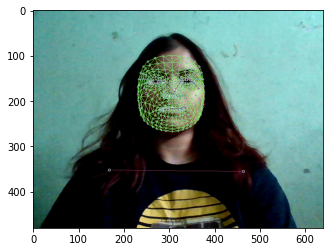

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## Extract Keypoint Values

In [7]:
results.pose_landmarks

landmark {
  x: 0.5327941179275513
  y: 0.5992197394371033
  z: -1.3892852067947388
  visibility: 0.9998308420181274
}
landmark {
  x: 0.5593194365501404
  y: 0.5315369963645935
  z: -1.330157995223999
  visibility: 0.9996792674064636
}
landmark {
  x: 0.5798705816268921
  y: 0.5329703688621521
  z: -1.3303827047348022
  visibility: 0.9996939301490784
}
landmark {
  x: 0.5965115427970886
  y: 0.5350135564804077
  z: -1.3304169178009033
  visibility: 0.9996227622032166
}
landmark {
  x: 0.49515289068222046
  y: 0.5315913558006287
  z: -1.325079321861267
  visibility: 0.9997060894966125
}
landmark {
  x: 0.47471946477890015
  y: 0.5337189435958862
  z: -1.3242558240890503
  visibility: 0.999745786190033
}
landmark {
  x: 0.4585810601711273
  y: 0.5368558168411255
  z: -1.3246433734893799
  visibility: 0.9997453093528748
}
landmark {
  x: 0.6280163526535034
  y: 0.5710594654083252
  z: -0.8535940051078796
  visibility: 0.999660849571228
}
landmark {
  x: 0.43709737062454224
  y: 0.5759995

In [8]:
len(results.pose_landmarks.landmark)

33

In [9]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [10]:
pose

[array([ 0.53279412,  0.59921974, -1.38928521,  0.99983084]),
 array([ 0.55931944,  0.531537  , -1.330158  ,  0.99967927]),
 array([ 0.57987058,  0.53297037, -1.3303827 ,  0.99969393]),
 array([ 0.59651154,  0.53501356, -1.33041692,  0.99962276]),
 array([ 0.49515289,  0.53159136, -1.32507932,  0.99970609]),
 array([ 0.47471946,  0.53371894, -1.32425582,  0.99974579]),
 array([ 0.45858106,  0.53685582, -1.32464337,  0.99974531]),
 array([ 0.62801635,  0.57105947, -0.85359401,  0.99966085]),
 array([ 0.43709737,  0.57599956, -0.80217981,  0.99979794]),
 array([ 0.57546687,  0.6748867 , -1.20265818,  0.99986976]),
 array([ 0.49176446,  0.6707148 , -1.18940222,  0.99990004]),
 array([ 0.80841798,  0.91359365, -0.49331063,  0.99680406]),
 array([ 0.30479056,  0.93089402, -0.44115853,  0.99817055]),
 array([ 0.97643852,  1.28994346, -0.54188478,  0.18921873]),
 array([ 0.18258704,  1.41424584, -0.36035016,  0.41159648]),
 array([ 0.96972179,  1.55965292, -1.16533685,  0.08609495]),
 array([

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404) 

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test

array([ 0.53279412,  0.59921974, -1.38928521, ...,  0.        ,
        0.        ,  0.        ])

In [16]:
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 0.53279412,  0.59921974, -1.38928521, ...,  0.        ,
        0.        ,  0.        ])

## Setup folders for Data Collection

In [18]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join(r"C:\\Users\\Krittika\\MP_Data") 

# Actions that we try to detect
actions = np.array(["Hello", "How are you", "I'm sorry", "Thank you", "I love you", "Goodbye"])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [19]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## 5. Collect Keypoint Values for Training and Testing

In [88]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    for action in actions:
        
        for sequence in range(no_sequences):
            
            for frame_num in range(sequence_length):
                
                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)

                draw_styled_landmarks(image, results)
                
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    
                    cv2.imshow('OpenCV Feed', image)
                
              
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

             
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()


In [38]:
cap.release()
cv2.destroyAllWindows()

## 6. Preprocess Data and Create Labels and Features 

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
label_map

{'Hello': 0,
 'How are you': 1,
 "I'm sorry": 2,
 'Thank you': 3,
 'I love you': 4,
 'Goodbye': 5}

In [23]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [24]:
np.array(sequences).shape

(180, 30, 1662)

In [25]:
np.array(labels).shape

(180,)

In [26]:
X = np.array(sequences)

In [27]:
X.shape

(180, 30, 1662)

In [28]:
y = to_categorical(labels).astype(int)

In [29]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [31]:
X_train.shape

(171, 30, 1662)

In [35]:
y_test.shape

(9, 6)

## 7. Build and Train LSTM Neural Network 

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [33]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [34]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [35]:
res = [.7, 0.2, 0.1]

In [36]:
actions[np.argmax(res)]

'Hello'

In [37]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [42]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
6/6 [==============================] - 3s 131ms/step - loss: 5.1802 - categorical_accuracy: 0.1579
Epoch 2/2000
6/6 [==============================] - 0s 62ms/step - loss: 14.5317 - categorical_accuracy: 0.2573
Epoch 3/2000
6/6 [==============================] - 0s 62ms/step - loss: 36.1411 - categorical_accuracy: 0.1637
Epoch 4/2000
6/6 [==============================] - 0s 61ms/step - loss: 54.4695 - categorical_accuracy: 0.1637
Epoch 5/2000
6/6 [==============================] - 0s 62ms/step - loss: 35.8327 - categorical_accuracy: 0.0994
Epoch 6/2000
6/6 [==============================] - 0s 61ms/step - loss: 14.8116 - categorical_accuracy: 0.1462
Epoch 7/2000
6/6 [==============================] - 0s 61ms/step - loss: 13.1931 - categorical_accuracy: 0.1871
Epoch 8/2000
6/6 [==============================] - 0s 61ms/step - loss: 9.7400 - categorical_accuracy: 0.0936
Epoch 9/2000
6/6 [==============================] - 0s 61ms/step - loss: 6.9241 - categorical_accuracy: 0

KeyboardInterrupt: 

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 596,774
Trainable params: 596,774
Non-trainable params: 0
__________________________________________________

## 8. Make Predictions 

In [40]:
res = model.predict(X_test)

In [43]:
actions[np.argmax(res[1])]

'I love you'

In [44]:
actions[np.argmax(y_test[1])]

'Thank you'

## 9. Save Weights 

In [117]:
model.save('SignLanguage.h5')

In [38]:
# To reload the model

model.load_weights('SignLanguage.h5')

## 10. Evaluation using Confusion Matrix and Accuracy 

In [39]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [40]:
yhat = model.predict(X_test)

In [41]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [42]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[5, 0],
        [0, 4]],

       [[7, 0],
        [0, 2]],

       [[7, 0],
        [0, 2]],

       [[8, 0],
        [0, 1]]], dtype=int64)

In [43]:
accuracy_score(ytrue, yhat)

1.0

## 11. Test in Real Time 

In [44]:
from scipy import stats

In [45]:
colors = [(255,0,0), (0,255,0), (0,0,255), (255,255,0), (95,65,105), (255,125,125)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

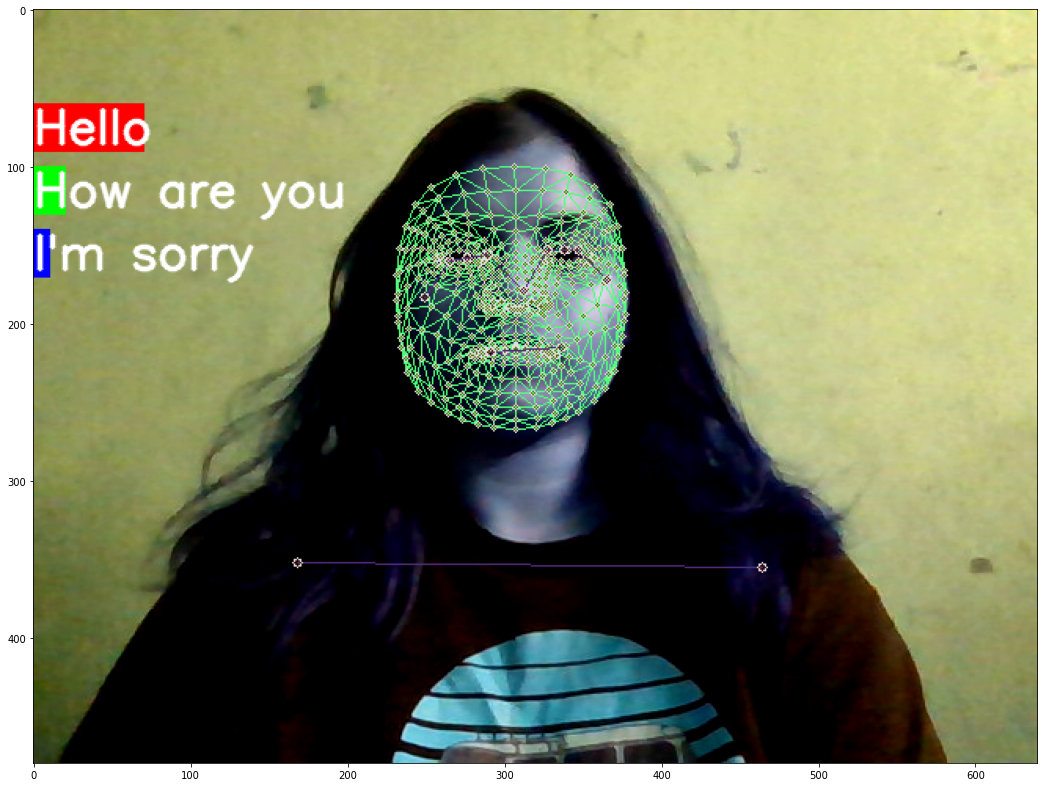

In [48]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [50]:
len(sequence)

TypeError: object of type 'int' has no len()

In [75]:
#sequence.append('def')

In [76]:
sequence.reverse()

In [57]:
sequence[-30:]

[array([ 0.55121607,  0.58719063, -0.90623605, ...,  0.12805158,
         0.44659576, -0.02932483]),
 array([ 0.55127275,  0.58721232, -0.89507133, ...,  0.123651  ,
         0.43678257, -0.03086102]),
 array([ 0.55111003,  0.58731121, -0.88687432, ...,  0.19677749,
         0.45888698, -0.02936526]),
 array([ 0.55177319,  0.58653665, -0.83212012, ...,  0.19577321,
         0.4509019 , -0.02369316]),
 array([ 0.55234098,  0.58603871, -0.82524252, ...,  0.21128376,
         0.45321056, -0.04610792]),
 array([ 0.55358517,  0.58527386, -0.95087957, ...,  0.14057916,
         0.434531  , -0.03158529]),
 array([ 0.55372846,  0.58493608, -0.98800963, ...,  0.19881164,
         0.4369719 , -0.04019278]),
 array([ 0.55393147,  0.58353007, -1.03519034, ...,  0.16937359,
         0.43804401, -0.01861845]),
 array([ 0.55398351,  0.5830096 , -0.9566046 , ...,  0.13141215,
         0.41179705, -0.02434828]),
 array([ 0.55215842,  0.58303577, -0.93522948, ...,  0.20211859,
         0.42604837, -0.03

In [49]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.8

cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while True:

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
         #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        

        # Show to screen
        cv2.imshow("OpenCV Feed", image)

        # Break gracefully
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [48]:
cap.release()
cv2.destroyAllWindows()